<a href="https://colab.research.google.com/github/MatthewSLLui/Metamaterial_Absorber_Inverse_Design/blob/main/for13apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/datasets/boss.xls', header= 0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from google.colab import drive


drive.mount('/content/drive')
X_for = df.iloc[:, 0:5]
y_for = df.iloc[:, 5:86]

# First split (Training and Temporary set)
X_train, X_temp, y_train, y_temp = train_test_split(X_for, y_for, test_size=0.3, random_state=42)

# Second split (Validation and Test sets from the Temporary set)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Directories to save the data splits
train_dir = '/content/drive/My Drive/for_train_data'
val_dir = '/content/drive/My Drive/for_val_data'
test_dir = '/content/drive/My Drive/for_test_data'


os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Subdirectories for X and y in train, val, and test directories
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(directory, 'X'), exist_ok=True)
    os.makedirs(os.path.join(directory, 'y'), exist_ok=True)

# Save X_train, y_train, X_val, y_val, X_test, y_test in respective directories
np.save(os.path.join(train_dir, 'X', 'X_train.npy'), X_train)
np.save(os.path.join(train_dir, 'y', 'y_train.npy'), y_train)
np.save(os.path.join(val_dir, 'X', 'X_val.npy'), X_val)
np.save(os.path.join(val_dir, 'y', 'y_val.npy'), y_val)
np.save(os.path.join(test_dir, 'X', 'X_test.npy'), X_test)
np.save(os.path.join(test_dir, 'y', 'y_test.npy'), y_test)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

def build_dense_model(input_dim, output_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(output_dim)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


dense_model = build_dense_model(X_train.shape[1], y_train.shape[1])
dense_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

model.save('/content/drive/MyDrive/forModel')  # Save in tensorflow format


Epoch 1/100


In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Range of hyperparameters to be investigated using gridsearch
param_grid = {
    'n_neurons': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1]
}

def build_dense_model(input_dim, output_dim, n_neurons, learning_rate):
    model = Sequential([
        Dense(n_neurons, activation='relu', input_dim=input_dim),
        Dense(int(n_neurons / 2), activation='relu'),
        Dense(output_dim)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


input_dim = 5
output_dim = 81

best_params = None
best_val_loss = float('inf')

# Iterate over all combinations in the grid
for params in ParameterGrid(param_grid):
    model = build_dense_model(input_dim, output_dim, **params)
    model.fit(X_train, y_train, epochs=100, callbacks=[callback], verbose=0)



    # Evaluate the model
    val_loss = model.evaluate(X_val, y_val, verbose=0)  # Set verbose to 0 for evaluation
    print(f"Tested Model with Parameters: {params}, Validation Loss: {val_loss}")

    # Update the best params if the current model is better
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_params = params

# Print the best parameters and their corresponding validation loss
print(f"Best Model Parameters: {best_params}, with Validation Loss: {best_val_loss}")


NameError: name 'X_train' is not defined

In [ ]:
print("X_train shape:", X_train.shape)  # Expected to be (?, 5)
print("y_train shape:", y_train.shape)  # Expected to be (?, 81)
print("X_test shape:", X_test.shape)      # Expected to be (?, 5)
print("y_test shape:", y_test.shape)      # Expected to be (?, 81)


NameError: name 'X_train' is not defined

In [ ]:
y


array([0.03599 , 0.038959, 0.035185, ..., 0.051298, 0.053641, 0.059323])

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Ensure this function is defined in your script or imported if it's defined elsewhere
def build_dense_model(input_dim, output_dim, n_neurons, learning_rate):
    model = Sequential([
        Dense(n_neurons, activation='relu', input_dim=input_dim),
        Dense(int(n_neurons / 2), activation='relu'),
        Dense(output_dim, activation='linear')  # Assuming a regression problem; adjust if necessary
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Setting up K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_idx = 1
results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # The output dimension for the model should be 1 if y is a single-target regression
    model = build_dense_model(X.shape[1], 1, best_params['n_neurons'], best_params['learning_rate'])

    print(f"Training fold {fold_idx}...")
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on the validation fold
    mse = model.evaluate(X_test, y_test, verbose=0)
    print(f"Validation MSE for fold {fold_idx}: {mse}")
    results.append(mse)

    fold_idx += 1

# Calculate average MSE across all folds
average_mse = np.mean(results)
print(f"Average MSE across all folds: {average_mse}")


Training fold 1...


KeyboardInterrupt: 

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping

# Define initial learning rate
learning_rate = 0.01

def build_dense_model(input_dim, output_dim, n_neurons, learning_rate):
    model = Sequential([
        Dense(n_neurons, activation='relu', input_dim=input_dim, kernel_initializer=HeNormal()),
        BatchNormalization(),  # Batch normalisation
        Dense(n_neurons, activation='relu', kernel_initializer=HeNormal()),
        BatchNormalization(),  # Batch normalisation
        Dense(n_neurons, activation='relu', kernel_initializer=HeNormal()),
        BatchNormalization(), # Batch normalisation
        Dense(output_dim, activation='linear')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

input_dim = 5
output_dim = 81
n_neurons = 256

model = build_dense_model(input_dim, output_dim, n_neurons, learning_rate)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Example placeholders for training data
# X_train, y_train, X_val, y_val = your_data_loading_function()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/50
35/35 [==============================] - 2s 12ms/step - loss: 0.2566 - val_loss: 3.2779
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.0448 - val_loss: 0.2231
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.0744
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0510
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0396 - val_loss: 0.0397
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.0356
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.0338
Epoch 8/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0330 - val_loss: 0.0366
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0324 - val_loss: 0.0328
Epoch 10/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.0297
Epoch 11/50
35/35 

In [ ]:
from tf_explain.core.integrated_gradients import IntegratedGradients

# Assuming `X_train` is your input and `index` is the sample index you are interested in
index = 0  # Example index
data = (X_train[index:index+1], None)  # Select a single sample from the training set

# Instantiate the explainer
explainer = IntegratedGradients()

# Compute attributions using the model and the data sample
attributions = explainer.explain(data, model, baseline=None, num_steps=50)

# `attributions` will give you the feature importances for the selected sample


TypeError: IntegratedGradients.explain() got an unexpected keyword argument 'baseline'

In [ ]:
!pip install opencv-python
!pip install tensorflow

import cv2
import tensorflow as tf

tf.__version__, cv2.__version__
('2.4.1', '4.1.2')

('2.4.1', '4.1.2')

In [ ]:
!pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 918.0 kB/s eta 0:00:00


In [ ]:
model.save('/content/drive/MyDrive/forModel')  # Saves in TensorFlow's SavedModel format


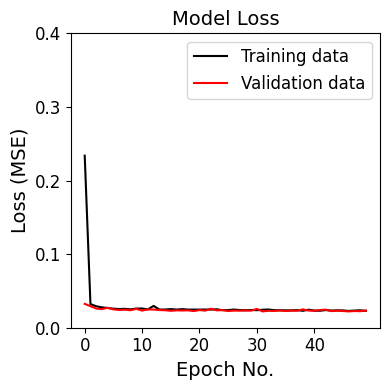

In [ ]:
import matplotlib.pyplot as plt

# Adjust the epoch numbers to start from 0 (assuming epoch count starts at 2 for the plot)
epochs_adjusted = list(range( len(history.history['loss'])))

# Adjust the loss values to start from epoch 2
train_loss_adjusted = history.history['loss']
val_loss_adjusted = history.history['val_loss']

# Set specific x-axis ticks
x_ticks = [0, 10,20,30,40]
y_ticks = [0,0.1,0.2,0.3,0.4]
# Plot Loss
plt.figure(figsize=(4,4))
plt.plot(epochs_adjusted, train_loss_adjusted, label='Train', color='black')
plt.plot(epochs_adjusted, val_loss_adjusted, label='Val', color='red')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.xlabel('Epoch No.', fontsize=14)
plt.xticks(x_ticks, fontsize = 12)
plt.yticks(y_ticks, fontsize = 12)
plt.ylim(0, 0.4)

plt.legend(['Training data', 'Validation data'], loc='upper right', fontsize=12)
plt.tight_layout()  # Automatically adjust subplot params to give the plot the right margins
plt.show()


8/8 [==============================] - 0s 3ms/step


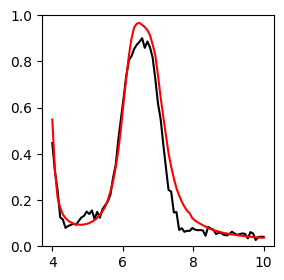

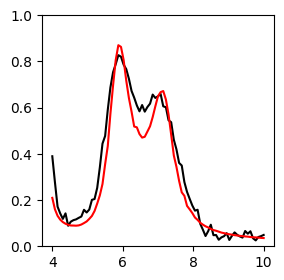

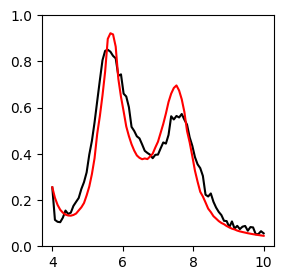

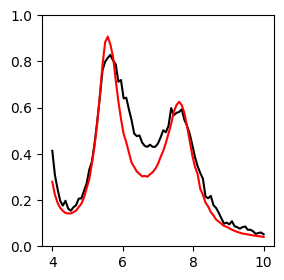

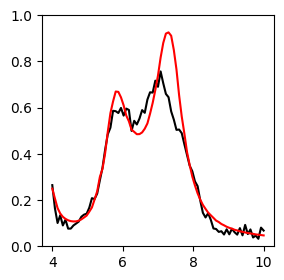

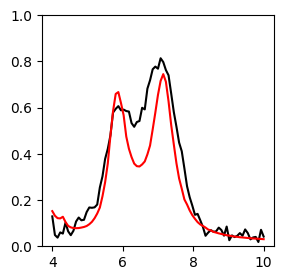

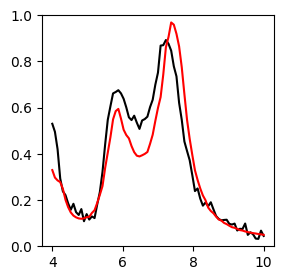

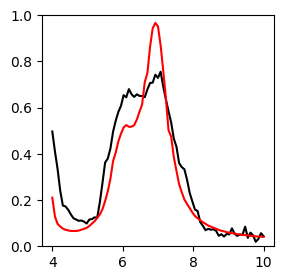

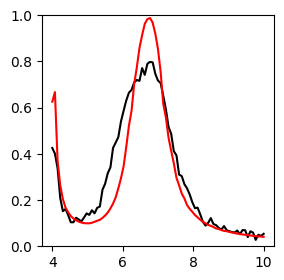

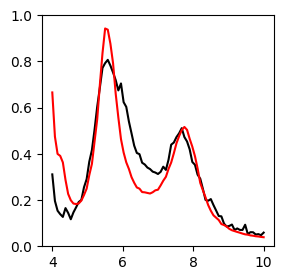

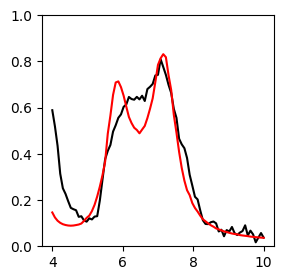

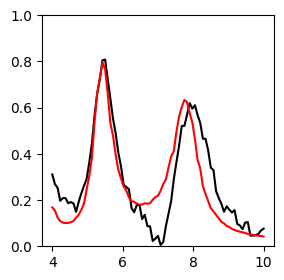

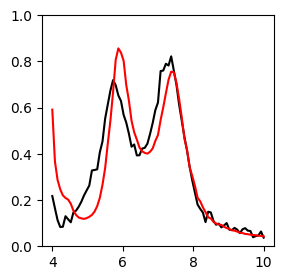

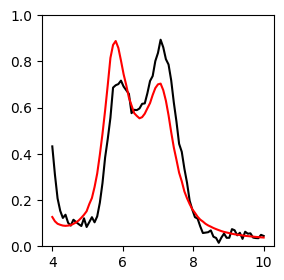

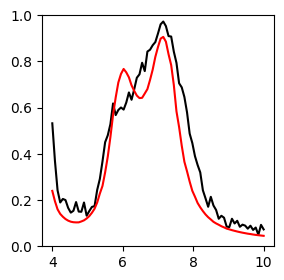

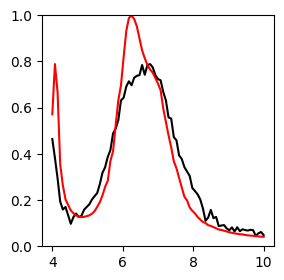

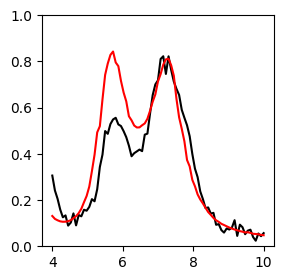

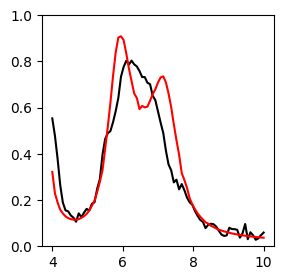

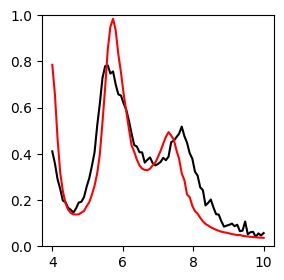

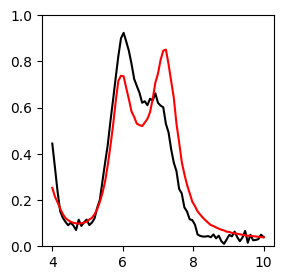

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test is your test data
y_pred = model.predict(X_test)

# Assuming x_values range from 0 to 80
x_values = np.linspace(4,10, num=81)  # Generating 81 points from 0 to 80

# Compute errors (MSE) between predicted and ground truth curves
errors = np.mean(np.square(y_pred - y_val), axis=1)

# Find indices of best fitted curves
best_indices = np.argsort(errors)  # Top 4 curves with lowest errors

# Ensure that best_indices are within the range of available data
best_indices = best_indices[:min(len(best_indices), 20)]

# Plot each best fitted curve separately
for idx in best_indices:
    plt.figure(figsize=(3,3))
    plt.plot(x_values, y_pred[idx], label='Predicted Curve', color='black')
    plt.plot(x_values, y_val.iloc[idx], label='Ground Truth Curve', color='red')
    #plt.legend()
    #3plt.title(f'Best Fitted Curve {idx}')
    #Wplt.xlabel('Wavelength (μm)', fontsize = 12)
    #plt.ylabel('Absorption', fontsize = 12)
    #plt.grid(True)
    plt.ylim(0,1)
    #plt.xlim(0, 80)  # Set x-axis limits to match the range of x_values
    plt.show()


In [ ]:
model.param()

AttributeError: 'Sequential' object has no attribute 'param'

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 256)               1536      
                                                                 
 batch_normalization_66 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_117 (Dense)           (None, 256)               65792     
                                                                 
 batch_normalization_67 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_118 (Dense)           (None, 256)               65792     
                                                                 
 batch_normalization_68 (Ba  (None, 256)             

In [ ]:
model.summary()
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights of {layer.name}: {weights}")
    print(f"Biases of {layer.name}: {biases}\n")

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 256)               1536      
                                                                 
 batch_normalization_66 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_117 (Dense)           (None, 256)               65792     
                                                                 
 batch_normalization_67 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_118 (Dense)           (None, 256)               65792     
                                                                 
 batch_normalization_68 (Ba  (None, 256)             

ValueError: too many values to unpack (expected 2)

In [ ]:
print("X_train shape:", X_train.shape)  # Should output (None, 85)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1120, 5)
y_train shape: (1120, 81)
X_val shape: (240, 5)
y_val shape: (240, 81)
X_test shape: (240, 5)
y_test shape: (240, 81)
